In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-06 06:21:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-06 06:21:13 (86.1 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [4]:
print(max_sequence_len)

11


In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences=True)))# An LSTM Layer
model.add(Dropout(0.2))# A dropout layer
model.add(LSTM(100))# Another LSTM Layer
model.add(Dense(total_words/2, activation='relu', kernel_regularizer = regularizers.l2()))# A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))# A Dense Layer
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['acc'])# Pick a loss function and an optimizer
print(model.summary())


W0806 06:37:16.678089 140184390137728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0806 06:37:16.712318 140184390137728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0806 06:37:16.720235 140184390137728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [7]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

W0806 06:37:37.337766 140184390137728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 42s 3ms/sample - loss: 6.9046 - acc: 0.0226
Epoch 2/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.5019 - acc: 0.0232
Epoch 3/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.3864 - acc: 0.0243
Epoch 4/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.2642 - acc: 0.0314
Epoch 5/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.1788 - acc: 0.0365
Epoch 6/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.1004 - acc: 0.0400
Epoch 7/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.0251 - acc: 0.0418
Epoch 8/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 5.9374 - acc: 0.0451
Epoch 9/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 5.8413 - acc: 0.0507
Epoch 10/100
15462/15462 [==============================] - 40s 3ms/sampl

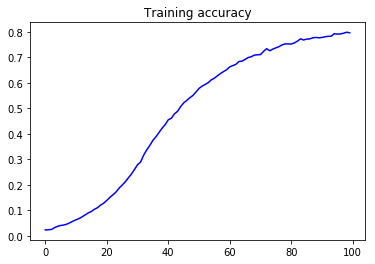

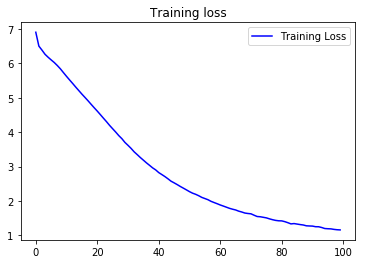

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope control your love of brow chase ill new ' more blest might ' be date lend praise show thee men ' now be too strong painted part to show me be slain ' be men's from it rage shall straight words rage rage ' made bear woe new days new words ' new rage made new dearth confounds from him me ' still alone still swearing alone so wit find the loss for that thy view were must away be delight light back confounds back back bright ' still back confounds him for love's woe ' ' still be confounds
